In [6]:
#importing libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading locally saved sneaker shop data:

df = pd.read_csv(r"D:/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
#The  average order value (AOV) is calculated as total order_amount devided by total number of items.
#inspecting data before calculation:


In [5]:
df.info()
#this shows that we don't have any missing values and the corresponding data types are aso appropriate.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [24]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


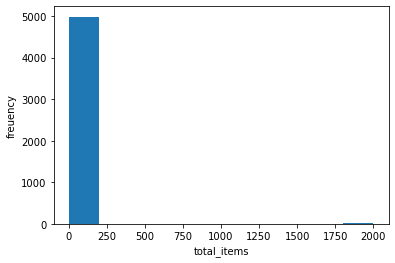

In [13]:
plt.hist(df['total_items'])
plt.ylabel('freuency')
plt.xlabel('total_items')
plt.show()
#this shows that there were say, some purchases where customer ordered 1760 to about 2000 items.

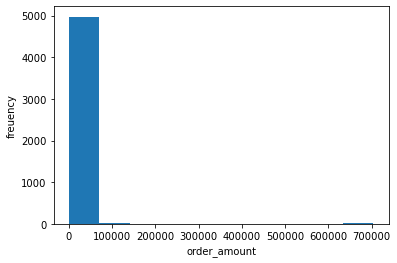

In [25]:
plt.hist(df['order_amount'])
plt.ylabel('freuency')
plt.xlabel('order_amount')
plt.show()
#this shows that there were some amounts that were way too high acting as outliers

In [26]:
df['order_amount'].describe()
#This tells that there are some outliers driving up the mean value too high!
#The maxvalue is also very high compared to the values of interquartile range.

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

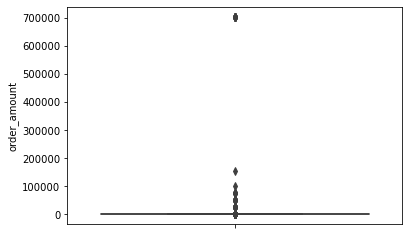

In [30]:
sns.boxplot( y=df["order_amount"] )
plt.show()

<AxesSubplot:>

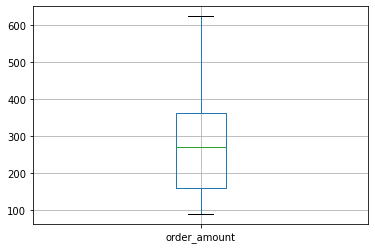

In [31]:
#One straight forward approach is to exclude outliers:
#the outliers can be removed by the following:

q1 = df.order_amount.quantile(q=0.25)
q2 = df.order_amount.quantile(q=0.5)
q3 = df.order_amount.quantile(q=0.75)
IQR = q3 - q1

df_trimmed = df[(df.order_amount < q2 + IQR * 1.5) & (df.order_amount > q2 - IQR * 1.5)]
df_trimmed.boxplot(column='order_amount')

In [32]:
df_trimmed['order_amount'].describe()

count    4738.000000
mean      283.814268
std       132.061996
min        90.000000
25%       161.000000
50%       272.000000
75%       362.000000
max       624.000000
Name: order_amount, dtype: float64

In [ ]:
# It also shows that the standard deviation is 132.06, a much more reasonable result and a mean of $283.

In [14]:
# Another approach is using the following metric as follows:

#average order value (AOV) is calculated as total order_amount devided by total number of items.:
AOV = sum(df['order_amount'])/sum(df['total_items'])

In [18]:
print('The AOV is '+ " $ %.2f" % AOV)
# this value is also reasobnable.

The AOV is  $ 357.92


In [22]:
# a)
# the incorrect AOV obtained could be due to outliers or extreme values present inthe data, most likely when 
# retailers purchase in bulk.Mean value is very sensitive to outliers can give misleading information.
#Therefore using the interquartile range to represent the sample and then calculating AOV should be considered.

In [ ]:
#b) and c)
# The correct AOV is $ 283.8